In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the cats vs dogs dataset
(train_ds, validation_ds), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
# Print information about the dataset
print('Dataset info:')
print(f'Number of training examples: {info.splits["train"].num_examples}')
print('\nFeatures:')
print(info.features)

Dataset info:
Number of training examples: 23262

Features:
FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})


In [4]:
# Data preprocessing
IMG_SIZE = 160

def preprocess(image, label):
    # Resize the image
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    # Normalize pixel values
    image = image / 255.0
    return image, label

BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Apply preprocessing to both datasets
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE)
validation_ds = validation_ds.map(preprocess, num_parallel_calls=AUTOTUNE)

# Configure datasets for performance
train_ds = train_ds.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
validation_ds = validation_ds.cache().batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [5]:
# Create the CNN model
model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(4, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(),
    
    # Second convolutional block
    tf.keras.layers.Conv2D(8, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # Third convolutional block
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (cat or dog)
])

# Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Display model summary
model.summary()

/Users/heinzschweitzer/Developer/FH-CampusWien/Python/fh-ai-venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        82,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,553 (330.29 KB)

 Trainable params: 84,553 (330.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
epochs = 20
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    verbose=1
)

Epoch 1/20


2025-06-11 19:35:29.878258: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


582/582 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.5184 - loss: 0.6897 - val_accuracy: 0.6440 - val_loss: 0.6526
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.5992 - loss: 0.6536 - val_accuracy: 0.6754 - val_loss: 0.6181
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6464 - loss: 0.6282 - val_accuracy: 0.6866 - val_loss: 0.5983
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6714 - loss: 0.6129 - val_accuracy: 0.6969 - val_loss: 0.5877
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6748 - loss: 0.6037 - val_accuracy: 0.7042 - val_loss: 0.5812
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6877 - loss: 0.5918 - val_accuracy: 0.7096 - val_loss: 0.5715
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7051 - loss: 0.5824 - val_accuracy: 0.7160 - val_loss: 0.5623
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7058 - loss: 0.5720 - val_accurac

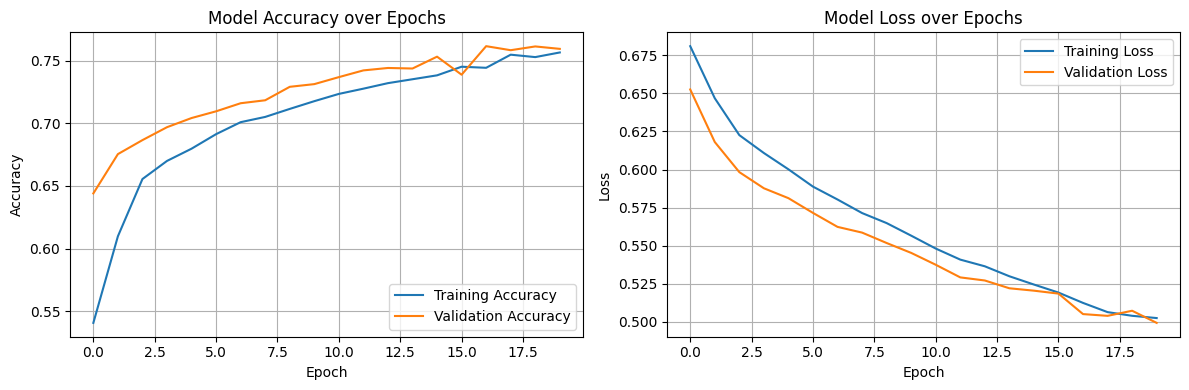


Final Training Metrics:
Training Accuracy: 0.7566
Validation Accuracy: 0.7595
Training Loss: 0.5025
Validation Loss: 0.4993


In [7]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics
print('\nFinal Training Metrics:')
print(f'Training Accuracy: {history.history["accuracy"][-1]:.4f}')
print(f'Validation Accuracy: {history.history["val_accuracy"][-1]:.4f}')
print(f'Training Loss: {history.history["loss"][-1]:.4f}')
print(f'Validation Loss: {history.history["val_loss"][-1]:.4f}')

Sample predictions on validation dataset:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


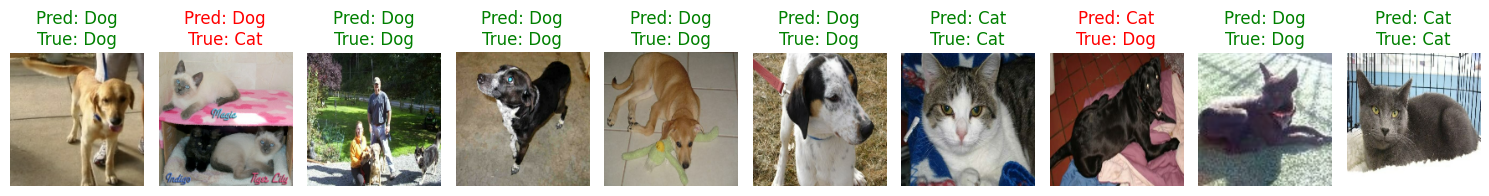

In [8]:
# Visualize some predictions
def plot_predictions(dataset, num_images=5):
    # Get a batch of images
    images, labels = next(iter(dataset.unbatch().batch(num_images)))
    
    # Make predictions
    predictions = model.predict(images)
    
    # Plot the images and predictions
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        pred_label = "Dog" if predictions[i] > 0.5 else "Cat"
        true_label = "Dog" if labels[i] == 1 else "Cat"
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}', color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize predictions on validation dataset
print("Sample predictions on validation dataset:")
plot_predictions(validation_ds, 10)